In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from google.colab import drive 
drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/TU Delft/BEP')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
data = pd.read_excel(r'Data/Table 16.xlsx')
event = data.loc[:,'Vital_Status':'Survival_Days']

for i in range(len(event.columns)):
  nodata = event.iloc[:,i] != 'No Data'
  event = event[nodata]

event = event.replace('Deceased',1)
event = event.replace('Alive',0)

In [12]:
event.sort_values(by=['Survival_Days'], axis=0, inplace=True)
event

,Vital_Status,Survival_Days
64,1,0
129,0,0
254,0,0
127,1,1
209,1,1
...,...,...
31,0,6864
175,1,6899
30,0,6986
135,0,7195


            0     1
0    0.997396     0
1    0.986897     1
2    0.979044     2
3    0.973822     3
4    0.971218     7
..        ...   ...
357  0.642986  6864
358  0.640383  6899
359  0.640383  6986
360  0.640383  7195
361  0.640383  9703

[362 rows x 2 columns]


(0.0, 1.0)

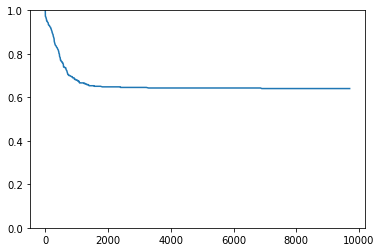

In [13]:
def kapmei(data):
  time = data.iloc[:,1].unique()
  number_live_patients = len(data)
  S = []
  di = []
  ni = []
  ti = []
  s = 1
  for t in time:
    events = data[data['Survival_Days'] == t]
    d = (sum(events['Vital_Status']))
    number_live_patients = number_live_patients - d
    ni.append(number_live_patients)
    di.append(d)
    #if d != 0:
    s = s * (1- d / number_live_patients)
    S.append(s)
    ti.append(t)

  return S, ti, ni, di, time

S, ti, ni, di, time= kapmei(event)
#print(time)
#plt.figure(figsize=[10,10])
df = pd.DataFrame(list(zip(S,ti)))
print(df)
plt.plot(ti,S)
plt.ylim([0,1])
#plt.xlim([0,700])

In [ ]:
!pip install lifelines
from lifelines import KaplanMeierFitter

(0.0, 1.0)

<Figure size 720x720 with 0 Axes>

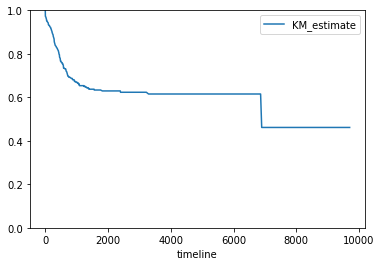

In [10]:
kmf = KaplanMeierFitter()
T = event['Survival_Days']
E = event['Vital_Status']
kmf.fit(T, E)
plt.figure(figsize=[10,10])
kmf.survival_function_.plot()
plt.ylim([0,1])
#plt.xlim([0,700])

In [14]:
print(kmf.fit(T,E))

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 385 total observations, 247 right-censored observations>
